# Overall Analysis and Implementation Plan
- `ID` - Set as Row Index - All values unique
- `User_ID` - Drop - PII - mobile number - we do not use Personal Information Identifiers in machine learning features
- `vehicle_model_id` - Drop, since >70% of values are 12

- Divide the data into 3 datasets based on travel_type_id, since for different travel types different features are applicable

- After dividing the data into 3 subsets, 3 different machine learning models are to be created:
1. ML Model 1 for travel_type_1
2. ML Model 2 for travel type_2
3. ML Model 3 for travel_type_3

# Below is the column-wise analysis for each subset regarding if they need to be dropped, kept or transformed.

## For travel_type_id = 1

- package_id - drop - all null values
- travel_type_id - drop - all same values
- from_area_id - transform and drop into cancellation volume i.e. Zero, High, Medium or Low cancellation area
- to_area_id - drop - all values null
- from_city_id - use mode to impute the null values
- to_city_id - use mode to impute the null values
- Make a column for inter-city routes - from_city_id -> to_city_id
- city_routes - transform into cancellation volume i.e. Zero, High, Medium or Low cancellation routes
- to_city_id, from_city_id, routes, cancellation_perc - drop
- from_date - transform into - dayOfWeek, Month, Weekday/weekend, TimeofDay(Hour | Morning Afternoon Evening Night)
- time_diff - calculate the number of hours b/w booking and actual start time in hours
- booking_nature - transform the time_diff into Urgent, SameDay, Regular, Advance bookings, since time_diff has >10% outliers
- online_booking | mobile_site_booking - keep
- from_date - drop
- booking_created - drop
- drop all 4 lat/long(from_lat,from_long,to_lat,to_long) as to_lat and to_long has all NULL values and from_lat,from_long's information is already captured in from_area_id


## For travel_type_id = 2

- package_id - drop - all null values
- travel_type_id - drop - all same values
- from_area_id,to_area_id - Make a column for intra-city routes - from_area_id -> to_area_id - transform into cancellation volume i.e. Zero, High, Medium or Low cancellation routes
- from_city_id - drop - all values null
- to_city_id - drop - all values null
- from_date - transform into - dayOfWeek, Month, Weekday/weekend, TimeofDay(Hour | Morning Afternoon Evening Night)
- time_diff - calculate the number of hours b/w booking and actual start time in hours
- booking_nature - transform the time_diff into Urgent, SameDay, Regular, Advance bookings, since time_diff has >10% outliers
- online_booking | mobile_site_booking - keep
- from_date - drop
- booking_created - drop
- from_lat,from_long,to_lat,to_long - impute missing using median
- from these lat/long - calculate the distance in KM (geopy) and then drop all four lat/long col


## For travel_type_id = 3

- package_id - keep
- travel_type_id - drop - all same values
- from_area_id - transform and drop into cancellation volume i.e. Zero, High, Medium or Low cancellation area
- to_area_id - drop - all values null
- from_city_id - drop - all values null
- to_city_id - drop - all values null
- from_date - transform into - dayOfWeek, Month, Weekday/weekend, TimeofDay(Hour | Morning Afternoon Evening Night)
- time_diff - calculate the number of hours b/w booking and actual start time in hours
- booking_nature - transform the time_diff into Urgent, SameDay, Regular, Advance bookings, since time_diff has >10% outliers
- online_booking | mobile_site_booking - keep
- from_date - drop
- booking_created - drop
- drop all 4 lat/long(from_lat,from_long,to_lat,to_long) as to_lat and to_long has all NULL values and from_lat,from_long's information is already captured in from_area_id


## Preprocess these subsets if required such as label encoding etc.


## Machine Learning - Classification
- Decision Tree
- Random Forest
- Naive Bayes Classifier

### Compare the performance and then select the BEST model for each of the three datasets


# Load the dataset

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('YourCabs.csv')

In [3]:
data.sample(5)

,id,user_id,vehicle_model_id,travel_type_id,package_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
6016,139886,18044,12,2,NaN,1136.0,1133.0,NaN,NaN,03-03-2013 12:30,1,0,03-03-2013 07:43,12.99049,77.69798,12.97440,77.69183,0
27043,165817,38910,12,2,NaN,968.0,393.0,15.0,NaN,08-09-2013 17:45,1,0,08-09-2013 16:02,12.96555,77.61912,13.19956,77.70688,0
14156,149885,27326,65,3,1.0,1189.0,NaN,NaN,NaN,5/19/2013 5:00,0,0,5/18/2013 14:26,12.91873,77.61494,NaN,NaN,0
22069,159696,20416,28,3,1.0,571.0,NaN,NaN,NaN,07-10-2013 12:15,0,0,07-10-2013 11:44,12.95185,77.69642,NaN,NaN,0
28459,167549,19566,12,2,NaN,458.0,585.0,15.0,NaN,8/17/2013 17:00,1,0,8/17/2013 13:23,13.00037,77.72746,12.97677,77.57270,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   43431 non-null  int64  
 1   user_id              43431 non-null  int64  
 2   vehicle_model_id     43431 non-null  int64  
 3   travel_type_id       43431 non-null  int64  
 4   package_id           7550 non-null   float64
 5   from_area_id         43343 non-null  float64
 6   to_area_id           34293 non-null  float64
 7   from_city_id         16345 non-null  float64
 8   to_city_id           1588 non-null   float64
 9   from_date            43431 non-null  object 
 10  online_booking       43431 non-null  int64  
 11  mobile_site_booking  43431 non-null  int64  
 12  booking_created      43431 non-null  object 
 13  from_lat             43338 non-null  float64
 14  from_long            43338 non-null  float64
 15  to_lat               34293 non-null 

## Set `id` as ROW INDEX

In [5]:
data.set_index('id',inplace=True)
data.head()

,user_id,vehicle_model_id,travel_type_id,package_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
id,,,,,,,,,,,,,,,,,
132512,22177,28,2,NaN,83.0,448.0,NaN,NaN,01-01-2013 02:00,0,0,01-01-2013 01:39,12.924150,77.672290,12.927320,77.635750,0
132513,21413,12,2,NaN,1010.0,540.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 02:25,12.966910,77.749350,12.927680,77.626640,0
132514,22178,12,2,NaN,1301.0,1034.0,NaN,NaN,01-01-2013 03:30,0,0,01-01-2013 03:08,12.937222,77.626915,13.047926,77.597766,0
132515,13034,12,2,NaN,768.0,398.0,NaN,NaN,01-01-2013 05:45,0,0,01-01-2013 04:39,12.989990,77.553320,12.971430,77.639140,0
132517,22180,12,2,NaN,1365.0,849.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 07:53,12.845653,77.677925,12.954340,77.600720,0


## Drop `user_id` & `vehicle_model_id`

In [6]:
data.drop(['user_id','vehicle_model_id'],axis=1,inplace=True)
data.head()

,travel_type_id,package_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
id,,,,,,,,,,,,,,,
132512,2,NaN,83.0,448.0,NaN,NaN,01-01-2013 02:00,0,0,01-01-2013 01:39,12.924150,77.672290,12.927320,77.635750,0
132513,2,NaN,1010.0,540.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 02:25,12.966910,77.749350,12.927680,77.626640,0
132514,2,NaN,1301.0,1034.0,NaN,NaN,01-01-2013 03:30,0,0,01-01-2013 03:08,12.937222,77.626915,13.047926,77.597766,0
132515,2,NaN,768.0,398.0,NaN,NaN,01-01-2013 05:45,0,0,01-01-2013 04:39,12.989990,77.553320,12.971430,77.639140,0
132517,2,NaN,1365.0,849.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 07:53,12.845653,77.677925,12.954340,77.600720,0


## Validate the Data Type for each col

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43431 entries, 132512 to 185941
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   travel_type_id       43431 non-null  int64  
 1   package_id           7550 non-null   float64
 2   from_area_id         43343 non-null  float64
 3   to_area_id           34293 non-null  float64
 4   from_city_id         16345 non-null  float64
 5   to_city_id           1588 non-null   float64
 6   from_date            43431 non-null  object 
 7   online_booking       43431 non-null  int64  
 8   mobile_site_booking  43431 non-null  int64  
 9   booking_created      43431 non-null  object 
 10  from_lat             43338 non-null  float64
 11  from_long            43338 non-null  float64
 12  to_lat               34293 non-null  float64
 13  to_long              34293 non-null  float64
 14  Car_Cancellation     43431 non-null  int64  
dtypes: float64(9), int64(4), object(2)


In [8]:
# data['package_id'] = data['package_id'].astype('int')

# data['from_area_id'] = data['from_area_id'].astype('object')
# data['to_area_id '] = data['to_area_id '].astype('object')
# data['from_city_id'] = data['from_city_id'].astype('object')
# data['to_city_id'] = data['to_city_id'].astype('object')

# data['from_date'] = pd.to_datetime(data['from_date'],format='mixed')
# data['booking_created'] = pd.to_datetime(data['booking_created'],format='mixed')

# Divide the dataset into 3 parts based on the travel_type_id

In [9]:
tt1 = data.loc[data.travel_type_id == 1]
tt1.head()

,travel_type_id,package_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
id,,,,,,,,,,,,,,,
132519,1,NaN,571.0,NaN,15.0,108.0,01-01-2013 09:45,0,0,01-01-2013 09:21,12.951850,77.696420,NaN,NaN,0
132531,1,NaN,1383.0,NaN,NaN,32.0,01-12-2013 08:00,1,0,01-01-2013 12:17,12.930451,77.685822,NaN,NaN,0
132539,1,NaN,515.0,NaN,15.0,32.0,01-05-2013 08:30,0,0,01-01-2013 14:40,12.978960,77.673450,NaN,NaN,0
132697,1,NaN,136.0,NaN,1.0,152.0,01-04-2013 09:30,1,0,01-03-2013 12:19,12.907960,77.624180,NaN,NaN,0
132760,1,NaN,1118.0,NaN,NaN,32.0,01-06-2013 07:30,1,0,01-04-2013 09:32,12.930220,77.560390,NaN,NaN,0


In [10]:
tt2 = data.loc[data.travel_type_id == 2]
tt2.head()

,travel_type_id,package_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
id,,,,,,,,,,,,,,,
132512,2,NaN,83.0,448.0,NaN,NaN,01-01-2013 02:00,0,0,01-01-2013 01:39,12.924150,77.672290,12.927320,77.635750,0
132513,2,NaN,1010.0,540.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 02:25,12.966910,77.749350,12.927680,77.626640,0
132514,2,NaN,1301.0,1034.0,NaN,NaN,01-01-2013 03:30,0,0,01-01-2013 03:08,12.937222,77.626915,13.047926,77.597766,0
132515,2,NaN,768.0,398.0,NaN,NaN,01-01-2013 05:45,0,0,01-01-2013 04:39,12.989990,77.553320,12.971430,77.639140,0
132517,2,NaN,1365.0,849.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 07:53,12.845653,77.677925,12.954340,77.600720,0


In [11]:
tt3 = data.loc[data.travel_type_id == 3]
tt3.head()

,travel_type_id,package_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
id,,,,,,,,,,,,,,,
132521,3,2.0,448.0,NaN,NaN,NaN,01-01-2013 16:00,0,0,01-01-2013 09:44,12.927320,77.635750,NaN,NaN,0
132535,3,2.0,471.0,NaN,NaN,NaN,01-01-2013 14:30,0,0,01-01-2013 12:52,13.018540,77.635240,NaN,NaN,0
132538,3,1.0,1286.0,NaN,NaN,NaN,01-01-2013 16:30,0,0,01-01-2013 14:39,12.973448,77.620320,NaN,NaN,0
132552,3,1.0,1323.0,NaN,NaN,NaN,01-01-2013 20:00,1,0,01-01-2013 17:25,12.869805,77.653211,NaN,NaN,0
132569,3,2.0,142.0,NaN,NaN,NaN,01-02-2013 03:00,0,0,01-01-2013 19:37,12.912810,77.609230,NaN,NaN,0


# Preproccessing `tt1`

In [12]:
tt1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1589 entries, 132519 to 185916
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   travel_type_id       1589 non-null   int64  
 1   package_id           0 non-null      float64
 2   from_area_id         1501 non-null   float64
 3   to_area_id           1 non-null      float64
 4   from_city_id         1393 non-null   float64
 5   to_city_id           1588 non-null   float64
 6   from_date            1589 non-null   object 
 7   online_booking       1589 non-null   int64  
 8   mobile_site_booking  1589 non-null   int64  
 9   booking_created      1589 non-null   object 
 10  from_lat             1496 non-null   float64
 11  from_long            1496 non-null   float64
 12  to_lat               1 non-null      float64
 13  to_long              1 non-null      float64
 14  Car_Cancellation     1589 non-null   int64  
dtypes: float64(9), int64(4), object(2)
m

## Drop the discussed cols

In [13]:
tt1.drop(['travel_type_id','package_id','to_area_id','from_lat','from_long','to_lat','to_long'],axis=1, inplace=True)
tt1.head(2)

,from_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation
id,,,,,,,,
132519,571.0,15.0,108.0,01-01-2013 09:45,0,0,01-01-2013 09:21,0
132531,1383.0,NaN,32.0,01-12-2013 08:00,1,0,01-01-2013 12:17,0


In [14]:
tt1['from_area_id'] = tt1['from_area_id'].astype('object')
tt1['from_city_id'] = tt1['from_city_id'].astype('object')
tt1['to_city_id'] = tt1['to_city_id'].astype('object')

In [15]:
tt1['from_date'] = pd.to_datetime(tt1['from_date'],format='mixed')
tt1['booking_created'] = pd.to_datetime(tt1['booking_created'],format='mixed')

In [16]:
tt1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1589 entries, 132519 to 185916
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   from_area_id         1501 non-null   object        
 1   from_city_id         1393 non-null   object        
 2   to_city_id           1588 non-null   object        
 3   from_date            1589 non-null   datetime64[ns]
 4   online_booking       1589 non-null   int64         
 5   mobile_site_booking  1589 non-null   int64         
 6   booking_created      1589 non-null   datetime64[ns]
 7   Car_Cancellation     1589 non-null   int64         
dtypes: datetime64[ns](2), int64(3), object(3)
memory usage: 111.7+ KB


## Missing Value Treatment

In [17]:
tt1.isnull().sum()

from_area_id            88
from_city_id           196
to_city_id               1
from_date                0
online_booking           0
mobile_site_booking      0
booking_created          0
Car_Cancellation         0
dtype: int64

In [18]:
tt1.describe(include=object)

,from_area_id,from_city_id,to_city_id
count,1501.0,1393.0,1588.0
unique,297.0,3.0,116.0
top,393.0,15.0,32.0
freq,257.0,1281.0,475.0


In [19]:
tt1.from_area_id.fillna('393.0',inplace=True)
tt1.from_city_id.fillna('15.0',inplace=True)
tt1.to_city_id.fillna('32.0',inplace=True)

In [20]:
tt1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1589 entries, 132519 to 185916
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   from_area_id         1589 non-null   object        
 1   from_city_id         1589 non-null   object        
 2   to_city_id           1589 non-null   object        
 3   from_date            1589 non-null   datetime64[ns]
 4   online_booking       1589 non-null   int64         
 5   mobile_site_booking  1589 non-null   int64         
 6   booking_created      1589 non-null   datetime64[ns]
 7   Car_Cancellation     1589 non-null   int64         
dtypes: datetime64[ns](2), int64(3), object(3)
memory usage: 111.7+ KB


## Transform & drop `from_area_id`

In [21]:
tt1[['from_area_id','Car_Cancellation']].groupby('from_area_id').mean()

,Car_Cancellation
from_area_id,
2.0,0.000000
24.0,0.000000
25.0,0.000000
49.0,0.000000
58.0,0.000000
...,...
1395.0,0.000000
1396.0,0.000000
1397.0,0.000000


In [22]:
from_area_id_cancel_perc = tt1[['from_area_id','Car_Cancellation']].groupby('from_area_id').mean()['Car_Cancellation']
tt1['from_area_cancel_perc'] = tt1.from_area_id.map(from_area_id_cancel_perc)
tt1.head()

,from_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,from_area_cancel_perc
id,,,,,,,,,
132519,571.0,15.0,108.0,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,0.020408
132531,1383.0,15.0,32.0,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,0.000000
132539,515.0,15.0,32.0,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,0,0.000000
132697,136.0,1.0,152.0,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,0,0.000000
132760,1118.0,15.0,32.0,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,0,0.000000


In [23]:
tt1.loc[tt1.from_area_cancel_perc>0,'from_area_cancel_perc']

id
132519    0.020408
132907    0.003891
132911    0.076923
133098    0.003891
133312    0.166667
            ...   
185701    0.020408
185732    0.003891
185738    0.020408
185843    0.003891
185899    0.003891
Name: from_area_cancel_perc, Length: 610, dtype: float64

In [24]:
tt1.loc[tt1.from_area_cancel_perc > 0,'from_area_cancel_perc'].describe()

count    610.000000
mean       0.034426
std        0.066407
min        0.003891
25%        0.003891
50%        0.020408
75%        0.022727
max        0.500000
Name: from_area_cancel_perc, dtype: float64

In [25]:
tt1.loc[tt1.from_area_cancel_perc > 0,'from_area_cancel_perc'].quantile(0.33)

np.float64(0.0038910505836575876)

In [26]:
tt1.loc[tt1.from_area_cancel_perc > 0,'from_area_cancel_perc'].quantile(0.66)

np.float64(0.022640232108317213)

In [27]:
tt1['from_area_cancel_vol'] = np.where(tt1.from_area_cancel_perc > 0.02264, 'High',
                              np.where(tt1.from_area_cancel_perc == 0.0, 'Zero',
                              np.where(tt1.from_area_cancel_perc < 0.0039, 'Low','Medium')))

In [28]:
tt1.head(20)

,from_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,from_area_cancel_perc,from_area_cancel_vol
id,,,,,,,,,,
132519,571.0,15.0,108.0,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,0.020408,Medium
132531,1383.0,15.0,32.0,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,0.000000,Zero
132539,515.0,15.0,32.0,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,0,0.000000,Zero
132697,136.0,1.0,152.0,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,0,0.000000,Zero
132760,1118.0,15.0,32.0,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,0,0.000000,Zero
132780,293.0,15.0,32.0,2013-01-05 08:00:00,0,0,2013-01-04 12:43:00,0,0.000000,Zero
132781,912.0,1.0,32.0,2013-01-05 06:00:00,1,0,2013-01-04 12:51:00,0,0.000000,Zero
132791,410.0,15.0,29.0,2013-01-09 06:00:00,0,0,2013-01-04 14:40:00,0,0.000000,Zero
132907,393.0,15.0,32.0,2013-01-05 22:45:00,0,0,2013-01-05 15:29:00,0,0.003891,Low


In [29]:
tt1.drop(['from_area_id','from_area_cancel_perc'],axis=1,inplace=True)

In [30]:
tt1.head()

,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,from_area_cancel_vol
id,,,,,,,,
132519,15.0,108.0,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,Medium
132531,15.0,32.0,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,Zero
132539,15.0,32.0,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,0,Zero
132697,1.0,152.0,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,0,Zero
132760,15.0,32.0,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,0,Zero


## Transform & drop `from_city_id` and `to_city_id`

In [31]:
tt1['city_route'] = tt1.from_city_id.astype('str') + '->' + tt1.to_city_id.astype('str')
tt1.head()

,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,from_area_cancel_vol,city_route
id,,,,,,,,,
132519,15.0,108.0,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,Medium,15.0->108.0
132531,15.0,32.0,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,Zero,15.0->32.0
132539,15.0,32.0,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,0,Zero,15.0->32.0
132697,1.0,152.0,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,0,Zero,1.0->152.0
132760,15.0,32.0,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,0,Zero,15.0->32.0


In [32]:
city_route_cancel_perc = tt1[['city_route','Car_Cancellation']].groupby('city_route').mean()['Car_Cancellation']
tt1['city_route_cancel_perc'] = tt1.city_route.map(city_route_cancel_perc)
tt1.head()

,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,from_area_cancel_vol,city_route,city_route_cancel_perc
id,,,,,,,,,,
132519,15.0,108.0,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,Medium,15.0->108.0,0.016129
132531,15.0,32.0,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,Zero,15.0->32.0,0.017937
132539,15.0,32.0,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,0,Zero,15.0->32.0,0.017937
132697,1.0,152.0,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,0,Zero,1.0->152.0,0.000000
132760,15.0,32.0,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,0,Zero,15.0->32.0,0.017937


In [33]:
tt1.loc[tt1.city_route_cancel_perc > 0,'city_route_cancel_perc'].quantile(0.33)

np.float64(0.017937219730941704)

In [34]:
tt1.loc[tt1.city_route_cancel_perc > 0,'city_route_cancel_perc'].quantile(0.66)

np.float64(0.017937219730941704)

In [35]:
tt1.loc[tt1.city_route_cancel_perc > 0,'city_route_cancel_perc'].describe()

count    793.000000
mean       0.026482
std        0.019527
min        0.012048
25%        0.017937
50%        0.017937
75%        0.037037
max        0.086957
Name: city_route_cancel_perc, dtype: float64

In [36]:
tt1['city_route_cancel_vol'] = np.where(tt1.city_route_cancel_perc >= 0.018, 'High',
                              np.where(tt1.city_route_cancel_perc == 0.0, 'Zero',
                              np.where(tt1.city_route_cancel_perc <= 0.017, 'Low','Medium')))

In [37]:
tt1.head(20)

,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,from_area_cancel_vol,city_route,city_route_cancel_perc,city_route_cancel_vol
id,,,,,,,,,,,
132519,15.0,108.0,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,Medium,15.0->108.0,0.016129,Low
132531,15.0,32.0,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,Zero,15.0->32.0,0.017937,Medium
132539,15.0,32.0,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,0,Zero,15.0->32.0,0.017937,Medium
132697,1.0,152.0,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,0,Zero,1.0->152.0,0.000000,Zero
132760,15.0,32.0,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,0,Zero,15.0->32.0,0.017937,Medium
132780,15.0,32.0,2013-01-05 08:00:00,0,0,2013-01-04 12:43:00,0,Zero,15.0->32.0,0.017937,Medium
132781,1.0,32.0,2013-01-05 06:00:00,1,0,2013-01-04 12:51:00,0,Zero,1.0->32.0,0.000000,Zero
132791,15.0,29.0,2013-01-09 06:00:00,0,0,2013-01-04 14:40:00,0,Zero,15.0->29.0,0.037037,High
132907,15.0,32.0,2013-01-05 22:45:00,0,0,2013-01-05 15:29:00,0,Low,15.0->32.0,0.017937,Medium


In [38]:
tt1.drop(['from_city_id','to_city_id','city_route','city_route_cancel_perc'],axis=1,inplace=True)
tt1.head()

,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,from_area_cancel_vol,city_route_cancel_vol
id,,,,,,,
132519,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,Medium,Low
132531,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,Zero,Medium
132539,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,0,Zero,Medium
132697,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,0,Zero,Zero
132760,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,0,Zero,Medium


## Date Preprocessing

In [39]:
tt1['month'] = tt1.from_date.dt.month
tt1['day'] = tt1.from_date.dt.dayofweek  # Monday is zero | Sunday is 6
tt1['hour'] = tt1.from_date.dt.hour
tt1.head(2)

,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,from_area_cancel_vol,city_route_cancel_vol,month,day,hour
id,,,,,,,,,,
132519,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,Medium,Low,1,1,9
132531,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,Zero,Medium,1,5,8


In [40]:
tt1['is_weekend'] = (tt1.day >= 5).astype('int')
tt1.head(2)

,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,from_area_cancel_vol,city_route_cancel_vol,month,day,hour,is_weekend
id,,,,,,,,,,,
132519,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,Medium,Low,1,1,9,0
132531,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,Zero,Medium,1,5,8,1


In [41]:
tt1['time_of_day'] = pd.cut(tt1.hour,bins=[-1,6,12,18,24],labels=['Night','Morning','Afternoon','Evening'])
tt1.head(2)

,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,from_area_cancel_vol,city_route_cancel_vol,month,day,hour,is_weekend,time_of_day
id,,,,,,,,,,,,
132519,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,Medium,Low,1,1,9,0,Morning
132531,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,Zero,Medium,1,5,8,1,Morning


In [42]:
tt1['time_diff'] = (tt1.from_date - tt1.booking_created).dt.total_seconds()/3600
tt1.head(2)

,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,from_area_cancel_vol,city_route_cancel_vol,month,day,hour,is_weekend,time_of_day,time_diff
id,,,,,,,,,,,,,
132519,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,Medium,Low,1,1,9,0,Morning,0.400000
132531,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,Zero,Medium,1,5,8,1,Morning,259.716667


In [43]:
tt1.drop(['from_date','booking_created'],axis=1,inplace=True)
tt1.head()

,online_booking,mobile_site_booking,Car_Cancellation,from_area_cancel_vol,city_route_cancel_vol,month,day,hour,is_weekend,time_of_day,time_diff
id,,,,,,,,,,,
132519,0,0,0,Medium,Low,1,1,9,0,Morning,0.400000
132531,1,0,0,Zero,Medium,1,5,8,1,Morning,259.716667
132539,0,0,0,Zero,Medium,1,5,8,1,Morning,89.833333
132697,1,0,0,Zero,Zero,1,4,9,0,Morning,21.183333
132760,1,0,0,Zero,Medium,1,6,7,1,Morning,45.966667


In [44]:
tt1 = tt1[['from_area_cancel_vol','city_route_cancel_vol','month','day','hour','is_weekend','time_of_day','time_diff','online_booking','mobile_site_booking','Car_Cancellation']]
tt1.head(2)

,from_area_cancel_vol,city_route_cancel_vol,month,day,hour,is_weekend,time_of_day,time_diff,online_booking,mobile_site_booking,Car_Cancellation
id,,,,,,,,,,,
132519,Medium,Low,1,1,9,0,Morning,0.400000,0,0,0
132531,Zero,Medium,1,5,8,1,Morning,259.716667,1,0,0


In [45]:
tt1.loc[tt1['Car_Cancellation'] == 1].head(2)

,from_area_cancel_vol,city_route_cancel_vol,month,day,hour,is_weekend,time_of_day,time_diff,online_booking,mobile_site_booking,Car_Cancellation
id,,,,,,,,,,,
144904,Low,High,5,6,8,1,Morning,617.650000,1,0,1
150507,High,High,5,4,4,0,Night,41.066667,1,0,1


## Outlier Analysis

<Axes: >

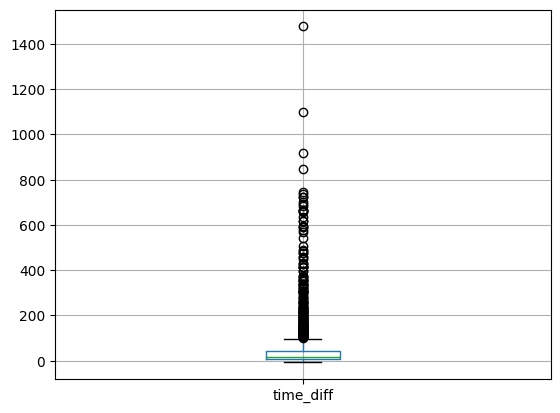

In [46]:
tt1.boxplot('time_diff')

In [47]:
Q1 = tt1.time_diff.quantile(0.25)
Q3 = tt1.time_diff.quantile(0.75)

IQR = Q3 - Q1

UL = Q3 + 1.5 * IQR
LL = Q1 - 1.5 * IQR

ul_count = tt1[tt1['time_diff'] > UL].shape[0]
ll_count = tt1[tt1['time_diff'] < LL].shape[0]

total_count = ul_count + ll_count
total_perc = total_count * 100 / tt1.shape[0]

print(f'Q1: {Q1} | Q3: {Q3} | IQR: {IQR} | UL: {UL} | LL: {LL} | UL Count: {ul_count} | LL Count: {ll_count} | Total Outliers: {total_count} | % Outliers: {round(total_perc)}%')

Q1: 9.05 | Q3: 44.55 | IQR: 35.5 | UL: 97.8 | LL: -44.2 | UL Count: 219 | LL Count: 0 | Total Outliers: 219 | % Outliers: 14%


In [48]:
tt1['time_diff'].describe()

count    1589.000000
mean       55.630407
std       114.717939
min        -7.700000
25%         9.050000
50%        16.950000
75%        44.550000
max      1477.183333
Name: time_diff, dtype: float64

In [49]:
tt1['time_diff'] = pd.cut(tt1.time_diff,bins=[-8,2,18,48,1500],labels=['Urgent','SameDay','Regular','Advance'])
tt1.head(2)

,from_area_cancel_vol,city_route_cancel_vol,month,day,hour,is_weekend,time_of_day,time_diff,online_booking,mobile_site_booking,Car_Cancellation
id,,,,,,,,,,,
132519,Medium,Low,1,1,9,0,Morning,Urgent,0,0,0
132531,Zero,Medium,1,5,8,1,Morning,Advance,1,0,0


# EDA

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

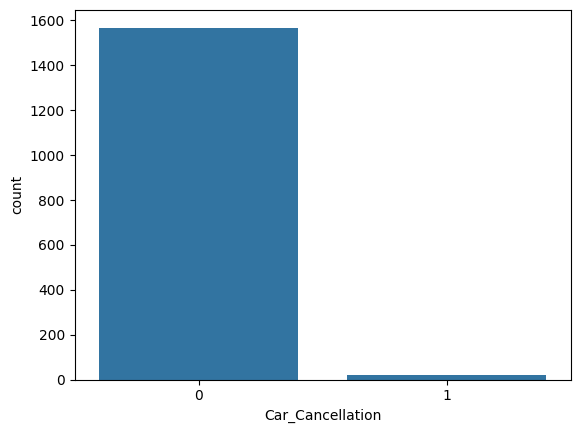

In [51]:
sns.countplot(x='Car_Cancellation', data=tt1)
plt.show()
# Analysis: Almost 1% of long distance travel is cancelled. May not be a huge difference to business and not useful for machine learning.

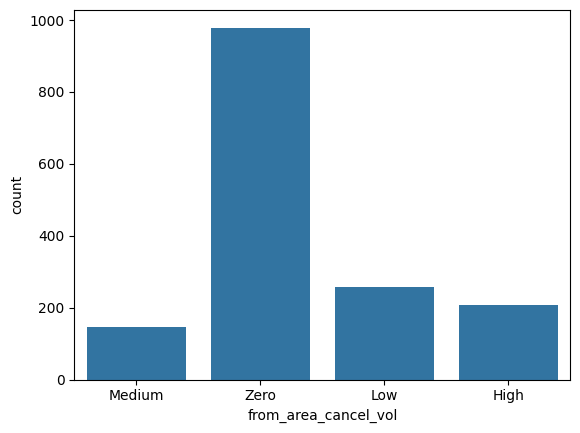

In [52]:
sns.countplot(x='from_area_cancel_vol', data=tt1)
plt.show()

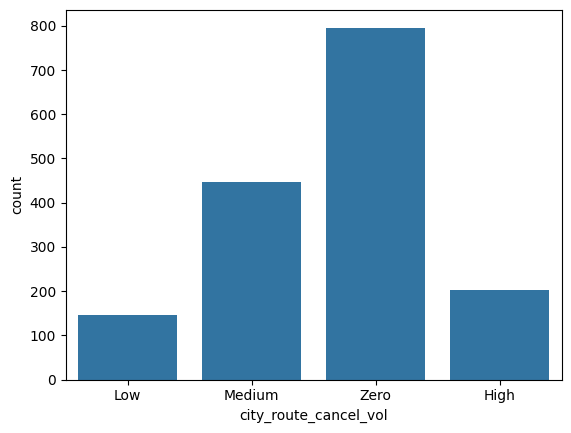

In [53]:
sns.countplot(x='city_route_cancel_vol', data=tt1)
plt.show()

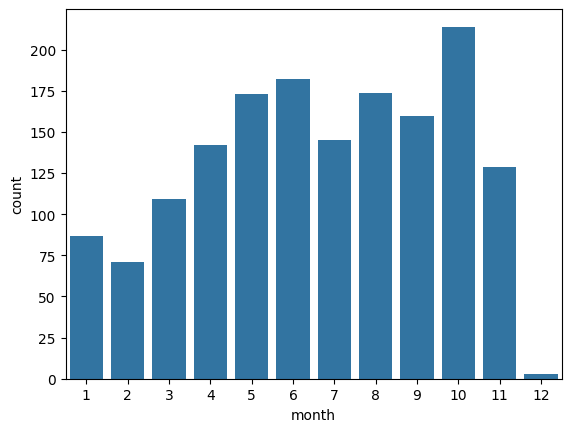

In [54]:
sns.countplot(x='month', data=tt1)
plt.show()

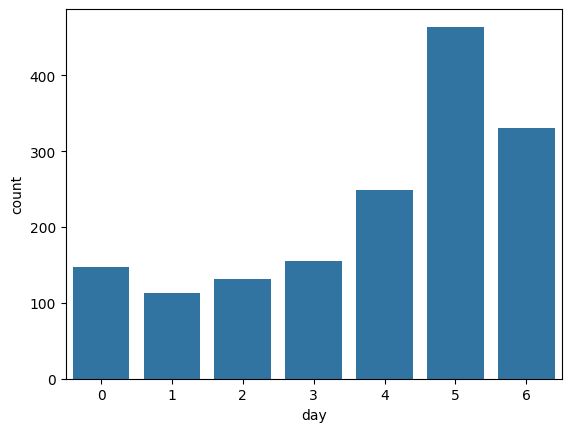

In [55]:
sns.countplot(x='day', data=tt1)
plt.show()

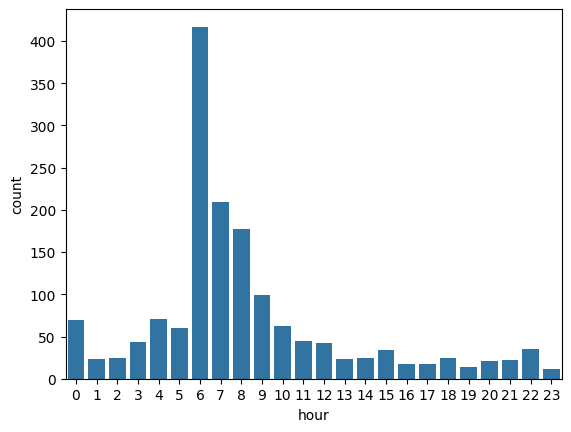

In [56]:
sns.countplot(x='hour', data=tt1)
plt.show()

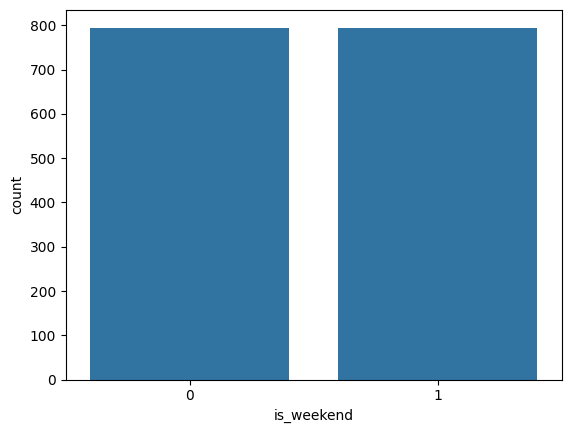

In [57]:
sns.countplot(x='is_weekend', data=tt1)
plt.show()

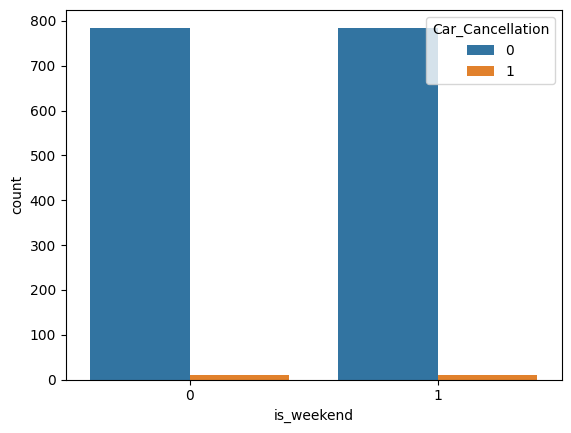

In [58]:
sns.countplot(x='is_weekend', hue='Car_Cancellation', data=tt1)
plt.show()

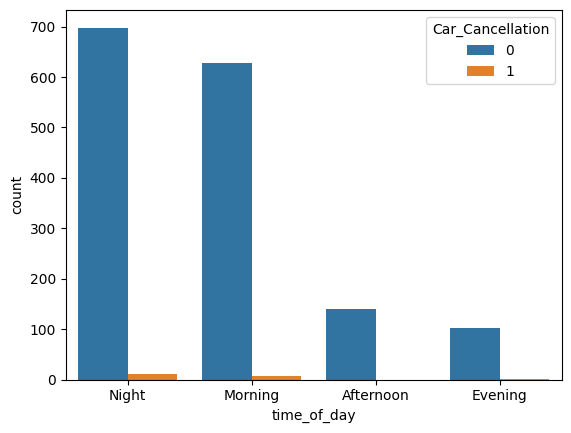

In [59]:
sns.countplot(x='time_of_day', hue='Car_Cancellation', data=tt1)
plt.show()

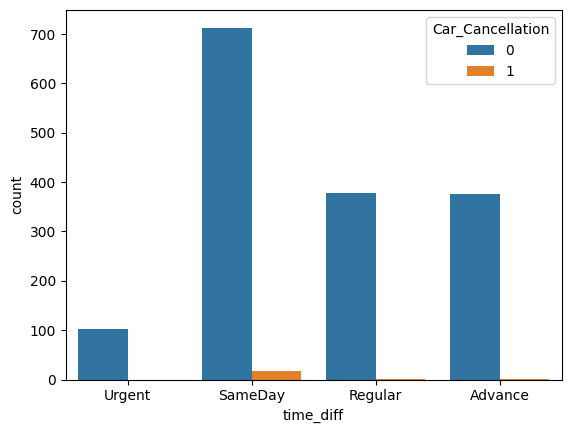

In [60]:
sns.countplot(x='time_diff', hue='Car_Cancellation', data=tt1)
plt.show()

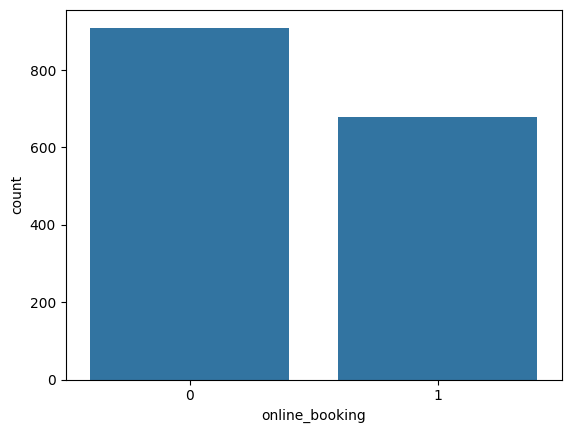

In [61]:
sns.countplot(x='online_booking', data=tt1)
plt.show()

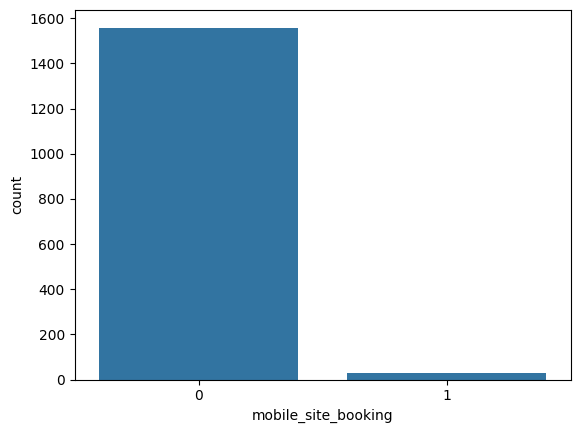

In [62]:
sns.countplot(x='mobile_site_booking', data=tt1)
plt.show()

In [63]:
tt1.head(1)

,from_area_cancel_vol,city_route_cancel_vol,month,day,hour,is_weekend,time_of_day,time_diff,online_booking,mobile_site_booking,Car_Cancellation
id,,,,,,,,,,,
132519,Medium,Low,1,1,9,0,Morning,Urgent,0,0,0


## Label Encoding

In [64]:
tt1.from_area_cancel_vol = tt1.from_area_cancel_vol.map({'Zero':0,'Low':1,'Medium':2,'High':3})
tt1.city_route_cancel_vol = tt1.city_route_cancel_vol.map({'Zero':0,'Low':1,'Medium':2,'High':3})
tt1.time_of_day = tt1.time_of_day.map({'Morning':1,'Afternoon':2,'Evening':3,'Night':4})
tt1.time_diff = tt1.time_diff.map({'Urgent':1,'SameDay':2,'Regular':3,'Advance':4})
tt1.head()

,from_area_cancel_vol,city_route_cancel_vol,month,day,hour,is_weekend,time_of_day,time_diff,online_booking,mobile_site_booking,Car_Cancellation
id,,,,,,,,,,,
132519,2,1,1,1,9,0,1,1,0,0,0
132531,0,2,1,5,8,1,1,4,1,0,0
132539,0,2,1,5,8,1,1,4,0,0,0
132697,0,0,1,4,9,0,1,3,1,0,0
132760,0,2,1,6,7,1,1,3,1,0,0


# Machine Learning

In [65]:
x = tt1.drop('Car_Cancellation',axis=1)
y = tt1['Car_Cancellation']

In [66]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3)

# Decision Tree Model

In [67]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [68]:
dt.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [69]:
ypred = dt.predict(xtest)

In [70]:
from sklearn.metrics import classification_report

In [71]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       473
           1       0.11      0.25      0.15         4

    accuracy                           0.98       477
   macro avg       0.55      0.62      0.57       477
weighted avg       0.99      0.98      0.98       477



> As you may see, because of the class imbalance the mode is too biased to be productive for prediction. Hence, travel type 1 is not fit for machine learning